Import Necessary Libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [94]:
file_path = "C:/Users/aryan/Downloads/Desktop/tagit-ai-transaction-analysis/data/txnmtb_cleaned.xlsx"
df = pd.read_excel(file_path)

Basic Information

In [95]:
print("Shape of the dataset:", df.shape)
print("\nColumn Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Shape of the dataset: (315, 40)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     315 non-null    int64  
 1   TXN_ID                 315 non-null    object 
 2   MERC_TXN_ID            315 non-null    object 
 3   PHONE_NO               0 non-null      float64
 4   TXN_DATE               315 non-null    object 
 5   TXN_NUM                315 non-null    int64  
 6   TXN_STATUS             315 non-null    object 
 7   TXN_AMOUNT             315 non-null    int64  
 8   FEE_AMOUNT             315 non-null    int64  
 9   TXN_TYPE               315 non-null    object 
 10  PAYMENT_TYPE           315 non-null    object 
 11  PAYMENT_REF_NO         267 non-null    object 
 12  TXN_FAILURE_CODE       0 non-null      float64
 13  TXN_FAILURE_TEXT       0 non-null      float64
 14  PRIMARYFIELD

Check for missing values

In [96]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
ID                         0
TXN_ID                     0
MERC_TXN_ID                0
PHONE_NO                 315
TXN_DATE                   0
TXN_NUM                    0
TXN_STATUS                 0
TXN_AMOUNT                 0
FEE_AMOUNT                 0
TXN_TYPE                   0
PAYMENT_TYPE               0
PAYMENT_REF_NO            48
TXN_FAILURE_CODE         315
TXN_FAILURE_TEXT         315
PRIMARYFIELD               0
SECONDARYFIELD             0
Fees                       1
AUDIT_FIELD8             315
CURRENCY_CODE              0
PHONE_MODEL               99
ACCESS_CHANNEL             0
FUTURE_TXN_DATE           99
APP_ID                     0
TENANT_ID                315
LAST_ACTION                0
STATUS                     0
STATUS_CHANGE_DATE         0
CREATED_BY                 0
CREATED_DATE               0
MODIFIED_BY               99
MODIFIED_DATE             99
VERSION$                   0
APPLICATION_ID           216
Transaction Type          

Univariate Analysis
Numerical Columns

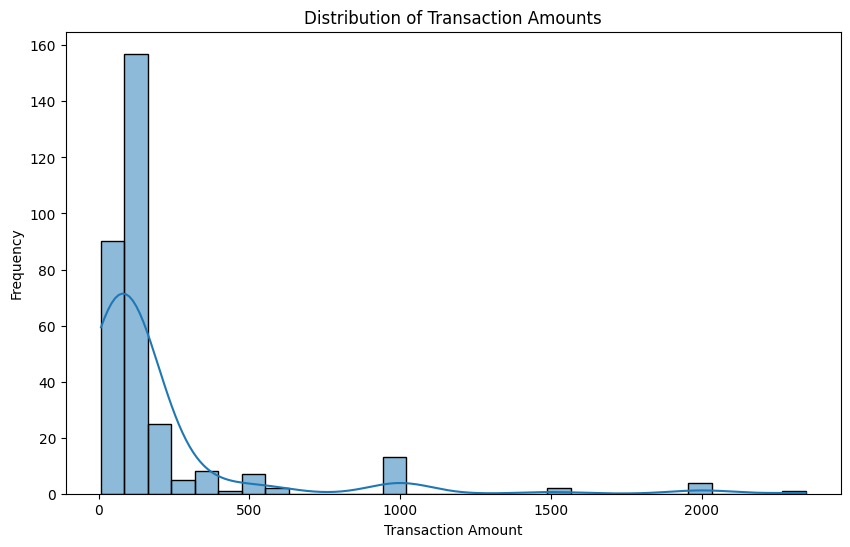

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TXN_AMOUNT'], bins=30, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

Categorical Columns

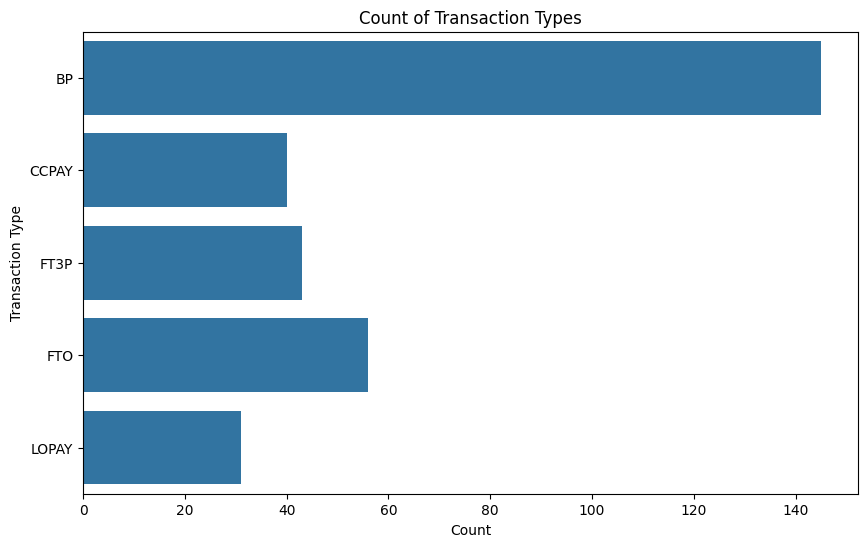

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['TXN_TYPE'])
plt.title("Count of Transaction Types")
plt.xlabel("Count")
plt.ylabel("Transaction Type")
plt.show()

Deciphering Transaction Types and Amounts

In [99]:
txn_type_counts = df['TXN_TYPE'].value_counts()
print("Transaction Type Counts:\n", txn_type_counts)

txn_avg_amount = df.groupby('TXN_TYPE')['TXN_AMOUNT'].mean()
print("\nAverage Transaction Amount by Type:\n", txn_avg_amount)

Transaction Type Counts:
 TXN_TYPE
BP       145
FTO       56
FT3P      43
CCPAY     40
LOPAY     31
Name: count, dtype: int64

Average Transaction Amount by Type:
 TXN_TYPE
BP       145.075862
CCPAY    198.100000
FT3P      87.046512
FTO      257.732143
LOPAY    338.935484
Name: TXN_AMOUNT, dtype: float64


Time-Based Analysis

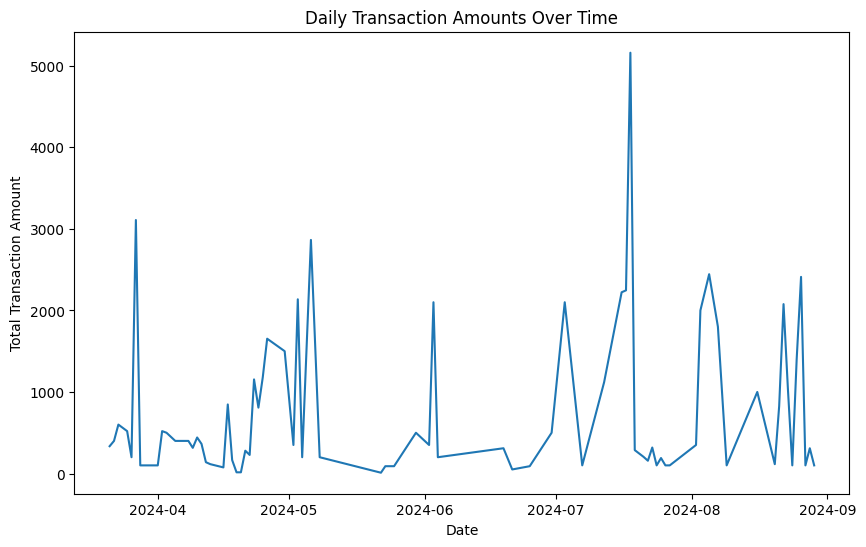

In [100]:
df['TXN_DATE'] = pd.to_datetime(df['TXN_DATE'])

daily_txn_amount = df.groupby(df['TXN_DATE'].dt.date)['TXN_AMOUNT'].sum()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
daily_txn_amount.plot()
plt.title("Daily Transaction Amounts Over Time")
plt.xlabel("Date")
plt.ylabel("Total Transaction Amount")
plt.show()

User-Specific Analysis 

In [101]:
# User Transaction Summary
user_summary = df.groupby('CIFID').agg({
    'TXN_AMOUNT': ['sum', 'mean', 'count'],
    'FEE_AMOUNT': ['sum', 'mean']
}).reset_index()

user_summary.columns = ['CIFID', 'Total_TXN_Amount', 'Avg_TXN_Amount', 'TXN_Count', 
                        'Total_Fee', 'Avg_Fee']

# Identify High-Spending Users
high_spenders = user_summary[user_summary['Total_TXN_Amount'] > user_summary['Total_TXN_Amount'].quantile(0.95)]
print("High-Spending Users:\n", high_spenders)


High-Spending Users:
       CIFID  Total_TXN_Amount  Avg_TXN_Amount  TXN_Count  Total_Fee  \
3  87654321             41337           153.1        270      40169   

      Avg_Fee  
3  148.774074  
